### 1. Choose subsample with main variables for your further analysis

In [1]:
!pip install scipy==1.6.2 --user

In [3]:
scipy.__version__

'1.6.2'

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy.stats.distributions import gamma
import math

In [2]:
#id - Unique ID for each home sold
#date - Date of the home sale
#price - Price of each home sold
#bedrooms - Number of bedrooms
#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
#sqft_living - Square footage of the apartments interior living space
#sqft_lot - Square footage of the land space
#floors - Number of floors
#waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
#view - An index from 0 to 4 of how good the view of the property was
#condition - An index from 1 to 5 on the condition of the apartment,
#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
#sqft_above - The square footage of the interior housing space that is above ground level
#sqft_basement - The square footage of the interior housing space that is below ground level
#yr_built - The year the house was initially built
#yr_renovated - The year of the house’s last renovation
#zipcode - What zipcode area the house is in
#lat - Lattitude
#long - Longitude
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
df=pd.read_csv("C:/Users/alexa/OneDrive/Рабочий стол/kc_house_data.csv")
df=df[(df['price']<df['price'].quantile(0.90))&(df['sqft_living']<df['sqft_living'].quantile(0.90))&
      (df['sqft_above']<df['sqft_above'].quantile(0.90))& 
      (df['sqft_living15']<df['sqft_living15'].quantile(0.90))]

In [9]:
df_price=df['price']/1000 #in thousands dollars
df_sqliv=df['sqft_living']/1000
df_sqlot=df['sqft_lot']/1000
df_sqabove=df['sqft_above']/1000
df_sqliv15=df['sqft_living15']/1000

data=[(df_price,'price'),(df_sqliv,'living square'),(df_sqabove,'square footage above ground level'),(df_sqliv15,'square footage for the nearest 15 neighbors')]
#data=[df_price,df_sqliv,df_sqabove,df_sqliv15]

### 2. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


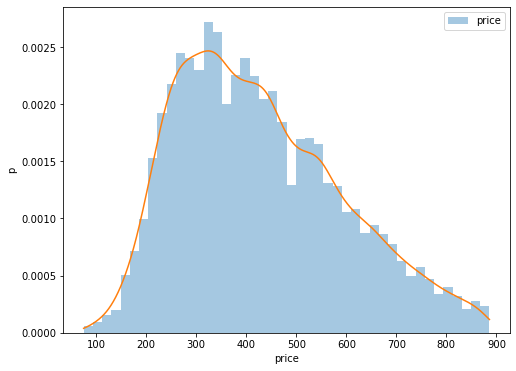

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


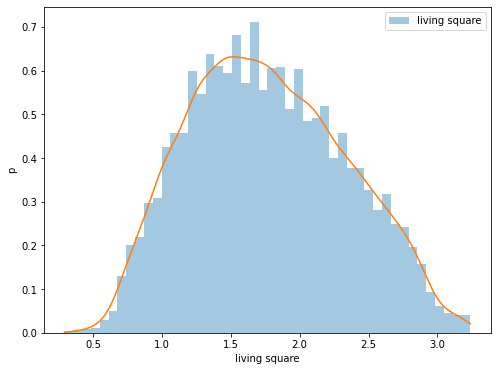

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


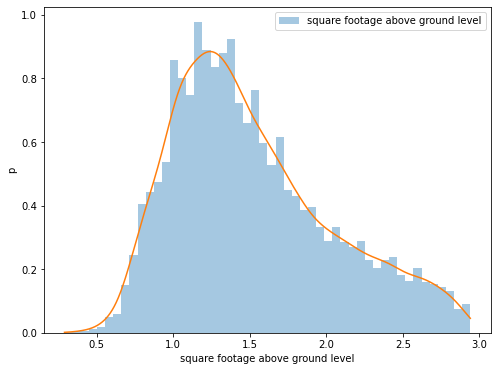

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


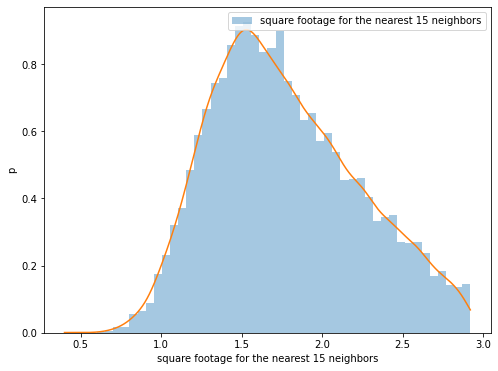

In [10]:
#Plotting a histogram and kernel density estimate
for i,j in data:

    plt.figure(figsize=(8, 6))

    kernel = scipy.stats.gaussian_kde(i)

    min_amount, max_amount = i.min(), i.max()
    x = np.linspace(min_amount, max_amount, len(i))
    kde_values = kernel(x)

    sns.distplot(i, kde=False, norm_hist=True, label=j)
    plt.plot(x, kde_values)

    plt.ylabel('p')
    plt.xlabel(j)
    # Display values along the abscissa axis only in the interval [0, 10000]

    plt.legend()
    plt.show()

### 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.

In [11]:
def fun_na(data):
    data=data.fillna(value=data.mean(), inplace=False)
    return data

df_price=fun_na(df_price)
df_sqliv=fun_na(df_sqliv)
df_sqlot=fun_na(df_sqlot)
df_sqabove=fun_na(df_sqabove)

In [12]:
def order_stat(data):
    mean=data.mean()
    var=data.var()
    median=data.median()
    q10=np.quantile(data, 0.1)
    q25=np.quantile(data, 0.25)
    q50=np.quantile(data, 0.5)
    q75=np.quantile(data, 0.75)
    q90=np.quantile(data, 0.9)
    return [round(mean,2),round(var,2),round(median,2),[q10,q25,q50,q75,q90]]

In [13]:
print('Mean, variance and median are:',order_stat(df_price))

Mean, variance and median are: [428.16, 27241.73, 403.0, [235.0, 299.95, 403.0, 539.95, 667.0]]


In [14]:
print('Mean, variance and median are:',order_stat(df_sqliv))

Mean, variance and median are: [1.77, 0.32, 1.73, [1.04, 1.33, 1.73, 2.18, 2.57]]


In [15]:
print('Mean, variance and median are:',order_stat(df_sqabove))

Mean, variance and median are: [1.52, 0.27, 1.41, [0.93, 1.13, 1.41, 1.83, 2.32]]


In [16]:
print('Mean, variance and median are:',order_stat(df_sqliv15))

Mean, variance and median are: [1.77, 0.21, 1.71, [1.22, 1.43, 1.71, 2.09, 2.44]]


C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 900.0), (-1.0, 1.0)]

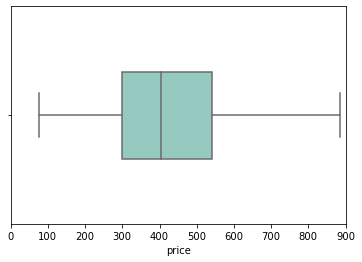

In [7]:
a=sns.boxplot(df_price,palette="Set3")
a.set(xlim=(0,900),ylim=(-1,1))

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 3.5), (-1.0, 1.0)]

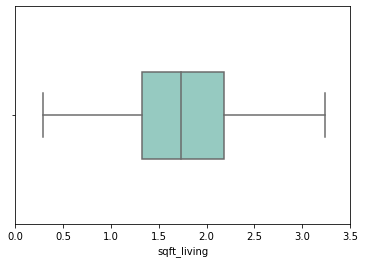

In [10]:
a=sns.boxplot(df_sqliv,palette="Set3")
a.set(xlim=(0,3.5),ylim=(-1,1))

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 3.0), (-1.0, 1.0)]

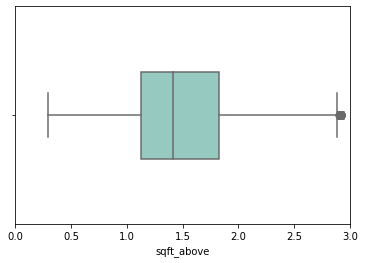

In [11]:
a=sns.boxplot(df_sqabove,palette="Set3")
a.set(xlim=(0,3),ylim=(-1,1))

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 3.0), (-1.0, 1.0)]

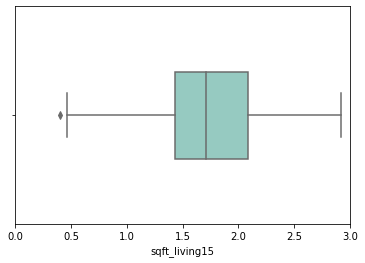

In [12]:
a=sns.boxplot(df_sqliv15,palette="Set3")
a.set(xlim=(0,3),ylim=(-1,1))

### 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

#### Gamma and normal

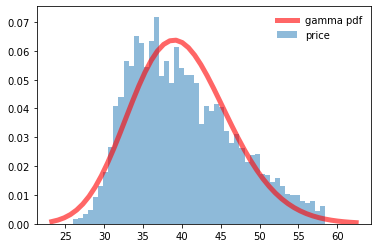

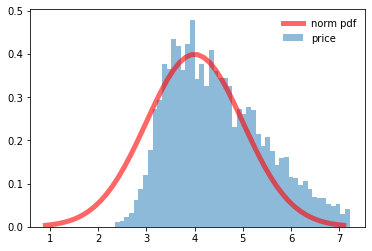

In [13]:
fig, ax = plt.subplots(1, 1)

a = 40
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')


x = np.linspace(gamma.ppf(0.001, a),
                gamma.ppf(0.999, a), 50)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')


r = data[0]*0.04+23

ax.hist(r, density=True, bins=5*round(math.log(len(r))), histtype='stepfilled', alpha=0.5,label =data[0].name)
ax.legend(loc='best', frameon=False)
plt.show()

fig, ax = plt.subplots(1, 1)

a = 4
mean, var, skew, kurt = norm.stats(a, moments='mvsk')


x = np.linspace(norm.ppf(0.001, a),
                norm.ppf(0.999, a), 50)
ax.plot(x, norm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='norm pdf')


r = data[0]*0.006+1.9

ax.hist(r, density=True, bins=5*round(math.log(len(r))), histtype='stepfilled', alpha=0.5,label =data[0].name)
ax.legend(loc='best', frameon=False)
plt.show()

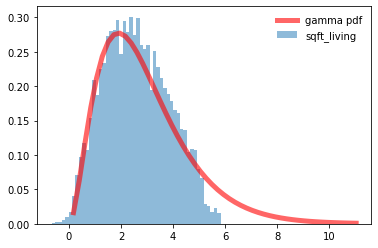

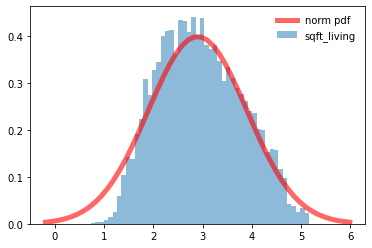

In [14]:
fig, ax = plt.subplots(1, 1)

a = 2.9
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')


x = np.linspace(gamma.ppf(0.001, a),
                gamma.ppf(0.999, a), 50)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')


r = data[1]*2.2-1.3

ax.hist(r, density=True, bins=5*round(math.log(len(r))), histtype='stepfilled', alpha=0.5,label =data[1].name)
ax.legend(loc='best', frameon=False)
plt.show()

fig, ax = plt.subplots(1, 1)

a = 2.9
mean, var, skew, kurt = norm.stats(a, moments='mvsk')


x = np.linspace(norm.ppf(0.001, a),
                norm.ppf(0.999, a), 50)
ax.plot(x, norm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='norm pdf')


r = data[1]*1.5+0.3

ax.hist(r, density=True, bins=5*round(math.log(len(r))), histtype='stepfilled', alpha=0.5,label =data[1].name)
ax.legend(loc='best', frameon=False)
plt.show()

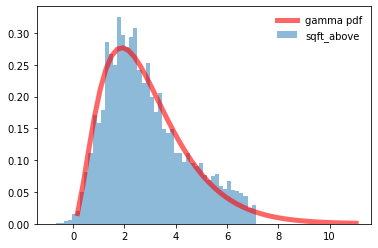

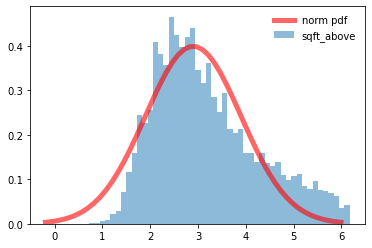

In [15]:
fig, ax = plt.subplots(1, 1)

a = 2.9
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')


x = np.linspace(gamma.ppf(0.001, a),
                gamma.ppf(0.999, a), 50)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')


r = data[2]*3-1.7

ax.hist(r, density=True, bins=5*round(math.log(len(r))), histtype='stepfilled', alpha=0.5,label =data[2].name)
ax.legend(loc='best', frameon=False)
plt.show()

fig, ax = plt.subplots(1, 1)

a = 2.9
mean, var, skew, kurt = norm.stats(a, moments='mvsk')


x = np.linspace(norm.ppf(0.001, a),
                norm.ppf(0.999, a), 50)
ax.plot(x, norm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='norm pdf')


r = data[2]*2.1

ax.hist(r, density=True, bins=5*round(math.log(len(r))), histtype='stepfilled', alpha=0.5,label =data[2].name)
ax.legend(loc='best', frameon=False)
plt.show()

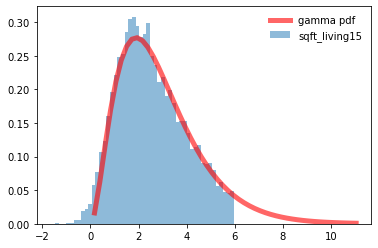

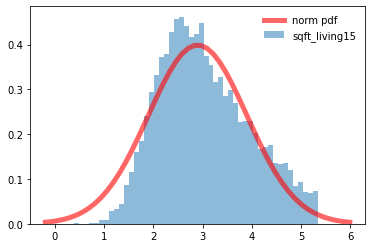

In [16]:
fig, ax = plt.subplots(1, 1)

a = 2.9
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')


x = np.linspace(gamma.ppf(0.001, a),
                gamma.ppf(0.999, a), 50)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')


r = data[3]*3-2.8

ax.hist(r, density=True, bins=5*round(math.log(len(r))), histtype='stepfilled', alpha=0.5,label =data[3].name)
ax.legend(loc='best', frameon=False)
plt.show()

fig, ax = plt.subplots(1, 1)

a = 2.9
mean, var, skew, kurt = norm.stats(a, moments='mvsk')


x = np.linspace(norm.ppf(0.001, a),
                norm.ppf(0.999, a), 50)
ax.plot(x, norm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='norm pdf')


r = data[3]*2-0.5

ax.hist(r, density=True, bins=5*round(math.log(len(r))), histtype='stepfilled', alpha=0.5,label =data[3].name)
ax.legend(loc='best', frameon=False)
plt.show()

### 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.

#### maximum likelihood estimation

In [75]:
for i in data:
    print(i.name)
    print('weibull_min',[round(scipy.stats.weibull_min.fit(i)[0],3),round(scipy.stats.weibull_min.fit(i)[1],3),round(scipy.stats.weibull_min.fit(i)[2],3)])
    print('norm',[round(scipy.stats.norm.fit(i)[0],3),round(scipy.stats.norm.fit(i)[1],3)])
    print('gamma',[round(scipy.stats.gamma.fit(i)[0],3),round(scipy.stats.gamma.fit(i)[1],3),round(scipy.stats.gamma.fit(i)[2],3)])
    print()

price
weibull_min [0.339, 75.0, 33.548]
norm [428.16, 165.046]
gamma [5.586, 31.565, 70.999]

sqft_living
weibull_min [2.861, 0.286, 1.667]
norm [1.769, 0.567]
gamma [20.954, -0.848, 0.125]

sqft_above
weibull_min [2.523, 0.289, 1.391]
norm [1.52, 0.523]
gamma [5.693, 0.276, 0.219]

sqft_living15
weibull_min [3.249, 0.397, 1.536]
norm [1.772, 0.459]
gamma [11.321, 0.217, 0.137]



#### least squares estimation

In [39]:
from scipy.optimize import curve_fit

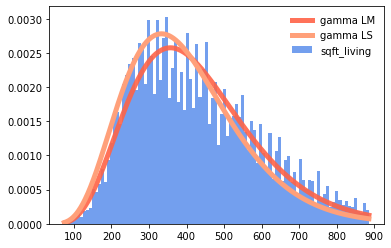

Parameters of gamma distribution are:  5.586 31.565 65.769


In [149]:
a,b,c=scipy.stats.gamma.fit(data[0])

def func(x,a,b,c):
    return gamma.pdf(x,a,b,c)

fig, ax = plt.subplots(1, 1)
t=ax.hist(data[0], density=True, bins=100, histtype='stepfilled', alpha=0.9,label =data[1].name,color='cornflowerblue') #histogram of observed variable

xx = sorted(data[0])[::len(data[0])//100][:1]

xdata = t[1]
ydata = t[0]

#ax.plot(xdata[1:], ydata, label='data')
ax.plot(sorted(data[0]), gamma.pdf(sorted(data[0]), *scipy.stats.gamma.fit(data[0])),
       'tomato', lw=5, alpha=0.9, label='gamma LM')


popt = curve_fit(func, xx, ydata,bounds=([0.01, -0.9, 0.01], [a,b,c]))[0]
aa,bb,cc=5.586, 31.565, 65.769

ax.plot(sorted(data[0]), func(sorted(data[0]), aa,bb,cc),color = 'lightsalmon',lw=5,label='gamma LS')


ax.legend(loc='best', frameon=False)
plt.show()

print('Parameters of gamma distribution are: ', aa,bb,cc)

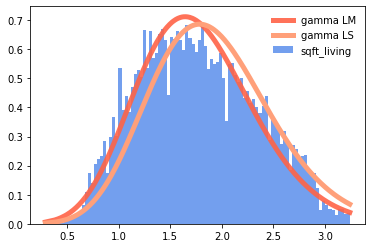

Parameters of gamma distribution are:  20.85397 -0.7948381 0.12991


In [89]:
a,b,c=scipy.stats.gamma.fit(data[1])

def func(x,a,b,c):
    return gamma.pdf(x,a,b,c)

fig, ax = plt.subplots(1, 1)
t=ax.hist(data[1], density=True, bins=100, histtype='stepfilled', alpha=0.9,label =data[1].name,color='cornflowerblue') #histogram of observed variable

xx = sorted(data[1])[::len(data[1])//100][:1]

xdata = t[1]
ydata = t[0]

#ax.plot(xdata[1:], ydata, label='data')
ax.plot(sorted(data[1]), gamma.pdf(sorted(data[1]), *scipy.stats.gamma.fit(data[1])),
       'tomato', lw=5, alpha=0.9, label='gamma LM')


popt = curve_fit(func, xx, ydata,bounds=([0.01, -0.9, 0.01], [a,b,c]))[0]
aa,bb,cc=20.85397, -0.7948381, 0.12991

ax.plot(sorted(data[1]), func(sorted(data[1]), aa,bb,cc),color = 'lightsalmon',lw=5,label='gamma LS')


ax.legend(loc='best', frameon=False)
plt.show()

print('Parameters of gamma distribution are: ', aa,bb,cc)

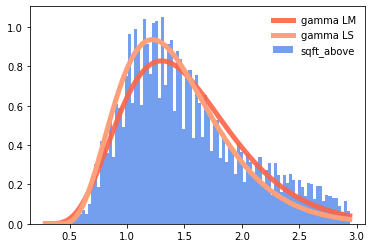

Parameters of gamma distribution are:  4.911 0.396 0.211


In [120]:
a,b,c=scipy.stats.gamma.fit(data[2])

def func(x,a,b,c):
    return gamma.pdf(x,a,b,c)

fig, ax = plt.subplots(1, 1)


t=ax.hist(data[2], density=True, bins=100, histtype='stepfilled', alpha=0.9,label =data[2].name,color='cornflowerblue') #histogram of observed variable

xx = sorted(data[2])[::len(data[2])//100][:-1]

xdata = t[1]
ydata = t[0]

#ax.plot(xdata[1:], ydata, label='data')
ax.plot(sorted(data[2]), gamma.pdf(sorted(data[2]), *scipy.stats.gamma.fit(data[2])),
       'tomato', lw=5, alpha=0.9, label='gamma LM')


popt = curve_fit(func, xx, ydata,bounds=([0.1, 0.1, 0.1], [a,b,c]))[0]
aa,bb,cc=4.911, 0.396, 0.211

ax.plot(sorted(data[2]), func(sorted(data[2]), aa,bb,cc), color = 'lightsalmon',lw=5,label='gamma LS')


ax.legend(loc='best', frameon=False)
plt.show()

print('Parameters of gamma distribution are: ', round(aa,3),round(bb,3),round(cc,3))

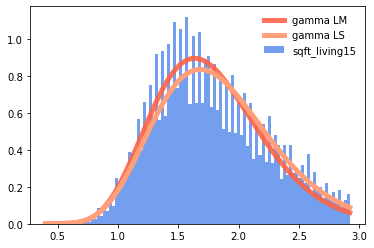

Parameters of gamma distribution are:  10.811 0.199 0.151


In [141]:
a,b,c=scipy.stats.gamma.fit(data[3])

def func(x,a,b,c):
    return gamma.pdf(x,a,b,c)

fig, ax = plt.subplots(1, 1)


t=ax.hist(data[3], density=True, bins=100, histtype='stepfilled', alpha=0.9,label =data[3].name,color='cornflowerblue') #histogram of observed variable

xx = sorted(data[3])[::len(data[3])//100][:-1]

xdata = t[1]
ydata = t[0]

#ax.plot(xdata[1:], ydata, label='data')
ax.plot(sorted(data[3]), gamma.pdf(sorted(data[3]), *scipy.stats.gamma.fit(data[3])),
       'tomato', lw=5, alpha=0.9, label='gamma LM')


popt = curve_fit(func, xx, ydata,bounds=([0.1, 0.1, 0.1], [a,b,c]))[0]
aa,bb,cc=10.811, 0.199, 0.151

ax.plot(sorted(data[3]), func(sorted(data[3]), aa,bb,cc), color = 'lightsalmon',lw=5,label='gamma LS')


ax.legend(loc='best', frameon=False)
plt.show()

print('Parameters of gamma distribution are: ', round(aa,3),round(bb,3),round(cc,3))

### 6. Validate your estimated parameters using QQ biplots.

#### Gamma

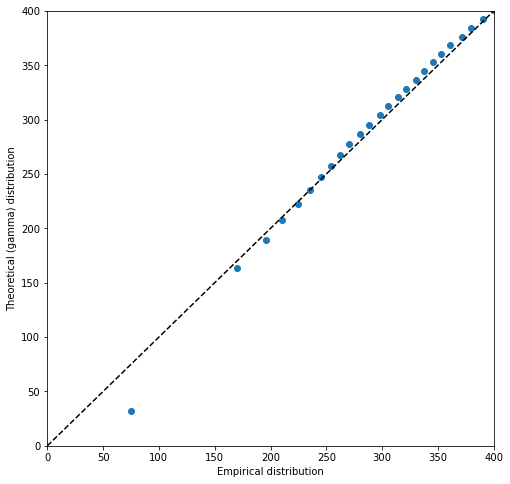

In [21]:
x = np.linspace(0, np.max(df_price))
params = scipy.stats.gamma.fit(df_price)

percs = np.linspace(0, 100)
qn_first = np.percentile(df_price, percs)
qn_gamma = scipy.stats.gamma.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(8, 8))
plt.plot(qn_first, qn_gamma, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gamma) distribution')

plt.show()

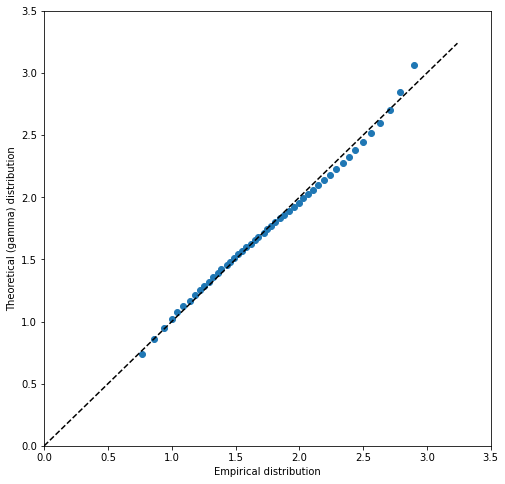

In [22]:
x = np.linspace(0, np.max(df_sqliv))
params = scipy.stats.gamma.fit(df_sqliv)

percs = np.linspace(0, 100)
qn_first = np.percentile(df_sqliv, percs)
qn_gamma = scipy.stats.gamma.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(8, 8))
plt.plot(qn_first, qn_gamma, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gamma) distribution')

plt.show()

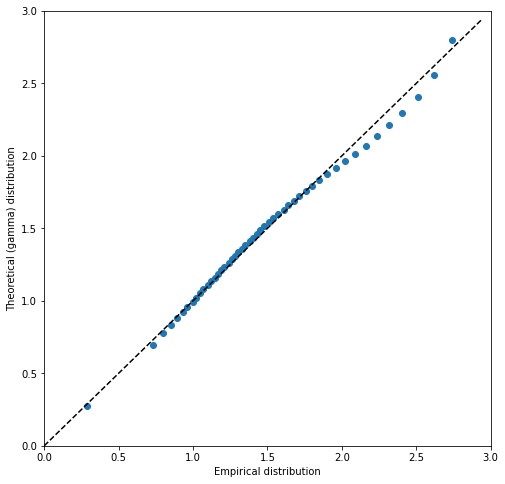

In [23]:
x = np.linspace(0, np.max(df_sqabove))
params = scipy.stats.gamma.fit(df_sqabove)

percs = np.linspace(0, 100)
qn_first = np.percentile(df_sqabove, percs)
qn_gamma = scipy.stats.gamma.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(8, 8))
plt.plot(qn_first, qn_gamma, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gamma) distribution')

plt.show()

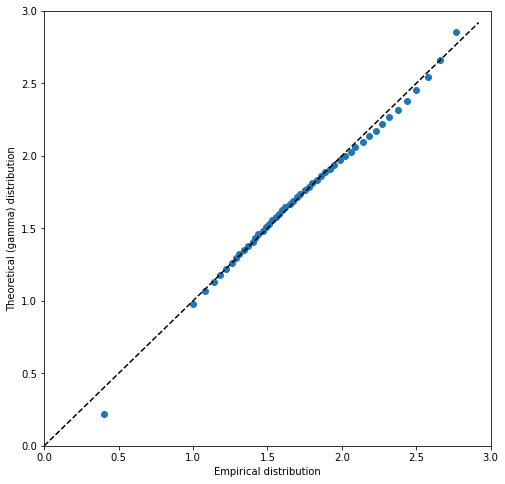

In [24]:
x = np.linspace(0, np.max(df_sqliv15))
params = scipy.stats.gamma.fit(df_sqliv15)

percs = np.linspace(0, 100)
qn_first = np.percentile(df_sqliv15, percs)
qn_gamma = scipy.stats.gamma.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(8, 8))
plt.plot(qn_first, qn_gamma, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gamma) distribution')

plt.show()

#### Norm

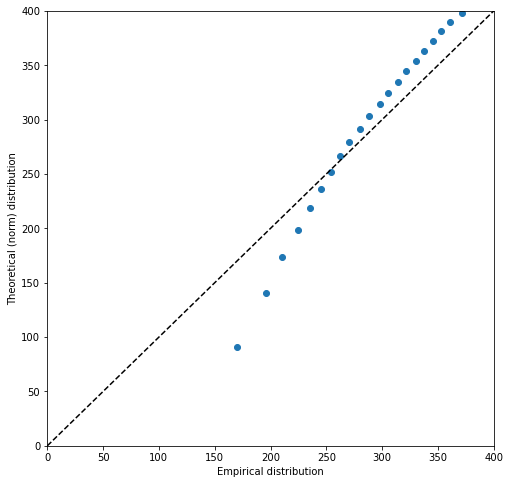

In [25]:
x = np.linspace(0, np.max(df_price))
params = scipy.stats.norm.fit(df_price)

percs = np.linspace(0, 100)
qn_first = np.percentile(df_price, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(8, 8))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (norm) distribution')

plt.show()

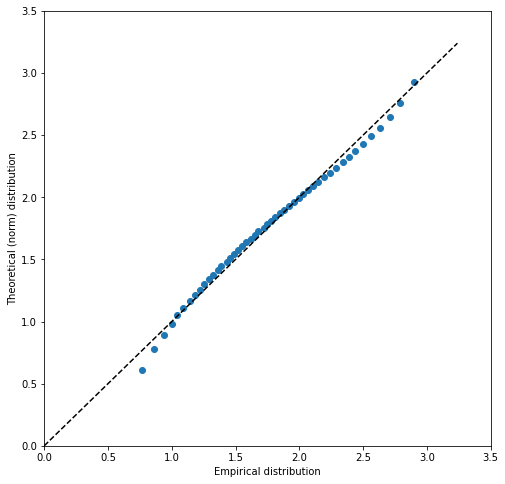

In [26]:
x = np.linspace(0, np.max(df_sqliv))
params = scipy.stats.norm.fit(df_sqliv)

percs = np.linspace(0, 100)
qn_first = np.percentile(df_sqliv, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(8, 8))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (norm) distribution')

plt.show()

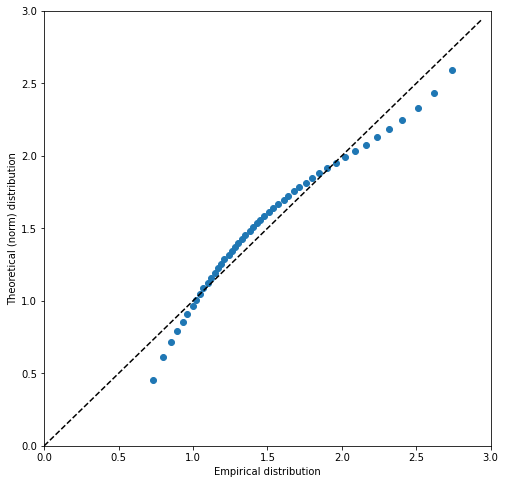

In [27]:
x = np.linspace(0, np.max(df_sqabove))
params = scipy.stats.norm.fit(df_sqabove)

percs = np.linspace(0, 100)
qn_first = np.percentile(df_sqabove, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(8, 8))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (norm) distribution')

plt.show()

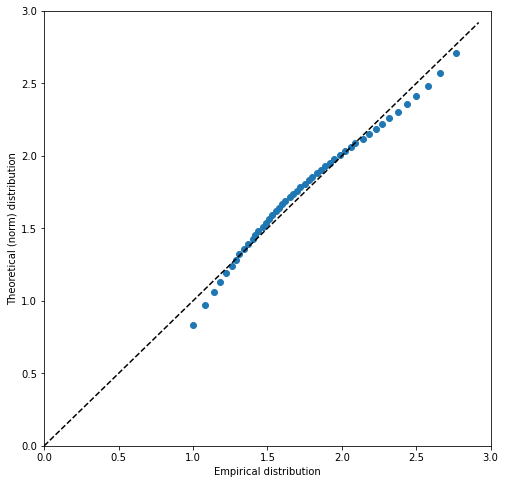

In [28]:
x = np.linspace(0, np.max(df_sqliv15))
params = scipy.stats.norm.fit(df_sqliv15)

percs = np.linspace(0, 100)
qn_first = np.percentile(df_sqliv15, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(8, 8))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (norm) distribution')

plt.show()

### 7. Estimate correctness of fitted distributions using at least 2 statistical tests.

#### KS and CvM tests

In [22]:
data=[df_price,df_sqliv,df_sqabove,df_sqliv15]

In [33]:
def tests_gamma(data,dist):
    percs = np.linspace(0, 100, 100)
    data1 = np.percentile(data, percs)
    ks = scipy.stats.kstest(data1, dist, args=scipy.stats.gamma.fit(data))
    cvm = scipy.stats.cramervonmises(data1,dist,args=scipy.stats.gamma.fit(data))
    return print(data.name,'Kolmogorov-Smirnov GAMMA: ', round(ks.pvalue,5),'.','Cramér-von Mises test pvalue: ',round(cvm.pvalue,5))

def tests_norm(data,dist):
    percs = np.linspace(0, 100, 100)
    data1 = np.percentile(data, percs)
    ks = scipy.stats.kstest(data1, dist, args=scipy.stats.norm.fit(data))
    cvm = scipy.stats.cramervonmises(data1,dist,args=scipy.stats.norm.fit(data))
    return print(data.name,'Kolmogorov-Smirnov NORM: ', round(ks.pvalue,5),'.','Cramér-von Mises test pvalue: ',round(cvm.pvalue,5))

In [34]:
tests_gamma(data[0],'gamma')
tests_norm(data[0],'norm')

price Kolmogorov-Smirnov GAMMA:  0.99989 . Cramér-von Mises test pvalue:  0.99202
price Kolmogorov-Smirnov NORM:  0.65005 . Cramér-von Mises test pvalue:  0.40695


In [35]:
tests_gamma(data[1],'gamma')
tests_norm(data[1],'norm')

sqft_living Kolmogorov-Smirnov GAMMA:  0.99917 . Cramér-von Mises test pvalue:  0.96159
sqft_living Kolmogorov-Smirnov NORM:  0.97685 . Cramér-von Mises test pvalue:  0.83317


In [36]:
tests_gamma(data[2],'gamma')
tests_norm(data[2],'norm')

sqft_above Kolmogorov-Smirnov GAMMA:  0.99769 . Cramér-von Mises test pvalue:  0.95496
sqft_above Kolmogorov-Smirnov NORM:  0.35566 . Cramér-von Mises test pvalue:  0.20459


In [37]:
tests_gamma(data[3],'gamma')
tests_norm(data[3],'norm')

sqft_living15 Kolmogorov-Smirnov GAMMA:  0.99984 . Cramér-von Mises test pvalue:  0.99144
sqft_living15 Kolmogorov-Smirnov NORM:  0.79389 . Cramér-von Mises test pvalue:  0.55883


In [153]:
def tests_gamma1(data,dist):
    percs = np.linspace(0, 100, 100)
    data1 = np.percentile(data, percs)
    ks = scipy.stats.kstest(data1, dist, args=scipy.stats.gamma.fit(data))
    cvm = scipy.stats.cramervonmises(data1,dist,args=scipy.stats.gamma.fit(data))
    return print(data.name,":",'KS test: ', round(ks.pvalue,5),'.','Cramer-von Mises test: ',round(cvm.pvalue,5))

for i in range(0,len(data)):
    tests_gamma1(data[i],'gamma')

price : KS test:  0.99989 . Cramer-von Mises test:  0.99202
sqft_living : KS test:  0.99917 . Cramer-von Mises test:  0.96159
sqft_above : KS test:  0.99769 . Cramer-von Mises test:  0.95496
sqft_living15 : KS test:  0.99984 . Cramer-von Mises test:  0.99144
